<a href="https://colab.research.google.com/github/ssuyyash19/pw_assignments/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
sns.set_style('whitegrid')
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['legend.facecolor'] = 'black'
plt.rcParams['legend.edgecolor'] = 'white'

In [16]:
pip install -q keras

In [19]:
import keras

In [21]:
dataset=pd.read_excel(r'/content/drive/MyDrive/data/Sales_data.xlsx')

In [22]:
dataset

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,0.0,Easy Ship,NaN
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,0.0,Easy Ship,NaN
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1.0,NaN,NaN
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,0.0,Easy Ship,NaN
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128946,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,0.0,NaN,False
128947,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0.0,NaN,False
128948,408-7436540-8728312,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,...,INR,696.00,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0.0,NaN,False
128949,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(dataset.head(10))

              Order ID        Date                        Status Fulfilment  \
0  405-8078784-5731545  30-04-2022                     Cancelled   Merchant   
1  171-9198151-1101146  30-04-2022  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146  30-04-2022                       Shipped     Amazon   
3  403-9615377-8133951  30-04-2022                     Cancelled   Merchant   
4  407-1069790-7240320  30-04-2022                       Shipped     Amazon   
5  404-1490984-4578765  30-04-2022                       Shipped     Amazon   
6  408-5748499-6859555  30-04-2022                       Shipped     Amazon   
7  406-7807733-3785945  30-04-2022  Shipped - Delivered to Buyer   Merchant   
8  407-5443024-5233168  30-04-2022                     Cancelled     Amazon   
9  402-4393761-0311520  30-04-2022                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style                  SKU  \
0      Amazon.in           Standard   SET389       SET389-KR-

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

In [23]:
dataset.loc[dataset["Courier Status"]=="Cancelled", "Amount"]=0

In [24]:
med = dataset["Amount"].median()
print(med)

597.0


In [26]:
dataset["Amount"].fillna(dataset["Amount"].median(), inplace= True)
dataset["currency"].fillna("INR", inplace = True)

/tmp/ipython-input-3679523535.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Amount"].fillna(dataset["Amount"].median(), inplace= True)


In [ ]:
print(dataset.describe())

                 Qty         Amount  ship-postal-code
count  128949.000000  128949.000000     128916.000000
mean        0.904629     617.962085     463978.298008
std         0.314782     304.569504     191473.322953
min         0.000000       0.000000     110001.000000
25%         1.000000     432.000000     382421.000000
50%         1.000000     597.000000     500033.000000
75%         1.000000     771.000000     600024.000000
max        15.000000    5584.000000     989898.000000


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            128949 non-null  object 
 14  Amount              128949 non-null  float64
 15  ship-city           128916 non-nul

**Financial Performance**

In [ ]:
total_revenue = dataset.groupby('currency')['Amount'].sum()
print(total_revenue)
print(f"Total_Revenue helps to enhance the financial performance of the company ")

currency
INR    79685592.94
Name: Amount, dtype: float64
Total_Revenue helps to enhance the financial performance of the company 


In [ ]:
Total_revenue = dataset[(dataset['Courier Status']!='Cancelled')&(dataset['Qty']!=0)]['Amount'].sum()
print(Total_revenue)

75454042.05


In [ ]:
Category_count = dataset.groupby('Category')['Qty'].sum().sort_values(ascending = False)
print(Category_count)
Total_Category = Category_count.sum()
print("Total_Category : ",Total_Category)


Category
Set              45288
kurta            45049
Western Dress    13943
Top               9902
Ethnic Dress      1052
Blouse             864
Bottom             398
Saree              152
Dupatta              3
Name: Qty, dtype: int64
Total_Category :  116651


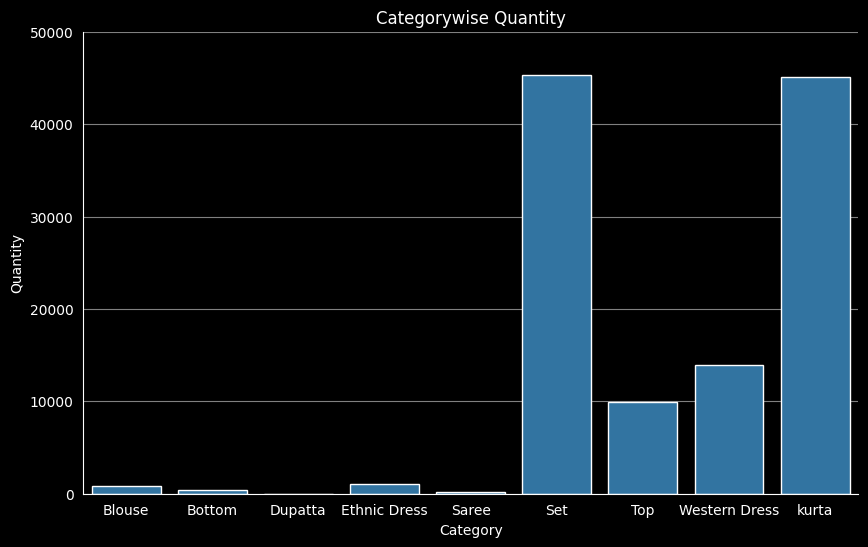

This analysis helps in undestanding Which and How much product is ordered. 


In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Category",y="Qty",data=dataset.groupby('Category')['Qty'].sum().reset_index())
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.title("Categorywise Quantity")
plt.ylim(0,50000)
sns.despine()
plt.show()
print(f"This analysis helps in undestanding Which and How much product is ordered. ")

In [ ]:
Top_sold_Product =Category_count.idxmax()
print(Top_sold_Product)
print(f"Top_sold_Product helps to understant the which product is liked by the customers")

Set
Top_sold_Product helps to understant the which product is liked by the customers


In [ ]:
Av_order_value = dataset.groupby('currency')['Amount'].mean()          # Av_order_value = dataset['Amount'].sum()/dataset['Amount'].count()
print(Av_order_value)
print("Average order value helps to understand the customers spending behaviour.")

currency
INR    617.962085
Name: Amount, dtype: float64
Average order value helps to understand the customers spending behaviour.


In [ ]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Month']=dataset['Date'].dt.month_name()
dataset['Day']=dataset['Date'].dt.day_name()
Monthwise_Sales_count=dataset.groupby('Month')['Qty'].sum().sort_values(ascending=False)
print("Month_count:",Monthwise_Sales_count)


Month_count: Month
April    44210
May      38016
June     34269
March      156
Name: Qty, dtype: int64


<ipython-input-20-6b3c667b6961>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['Date']=pd.to_datetime(dataset['Date'])


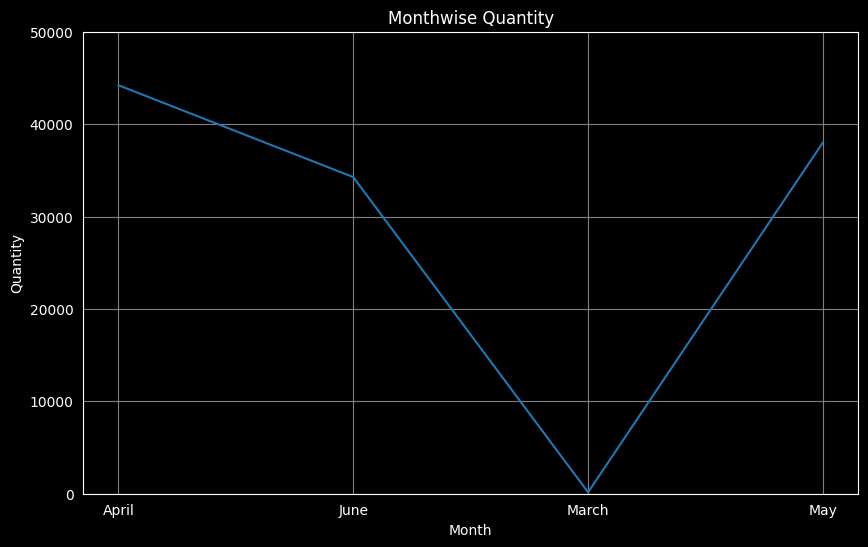

This plot helps to understand which month is more productive. 


In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Month",y="Qty",data=dataset.groupby('Month')['Qty'].sum().reset_index())
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Monthwise Quantity")
plt.ylim(0,50000)
plt.show()
print("This plot helps to understand which month is more productive. ")

In [ ]:
Peak_Day = dataset.groupby('Day')['Amount'].sum()
print(Peak_Day.idxmax())


Sunday


In [ ]:
Max_order_per_Day = dataset.groupby('Date')['Qty'].sum()
print(f"Most number of orders in one day is {Max_order_per_Day.max()} on {Max_order_per_Day.idxmax()}({Max_order_per_Day.idxmax().day_name()}) ")


Most number of orders in one day is 1889 on 2022-05-02 00:00:00(Monday) 


In [ ]:
Peak_Sales_Month=Monthwise_Sales_count.sort_values(ascending=False)
print(Peak_Sales_Month)
print("Peak_Sales_Month helps to managing the resources in most productive month for next year to enhance our sales.")

Month
April    44210
May      38016
June     34269
March      156
Name: Qty, dtype: int64
Peak_Sales_Month helps to managing the resources in most productive month for next year to enhance our sales.


In [ ]:
Month_Sales = dataset.groupby('Month')['Amount'].sum()
print(Month_Sales)

Month
April    29276322.96
June     23710462.38
March      101683.85
May      26597123.75
Name: Amount, dtype: float64


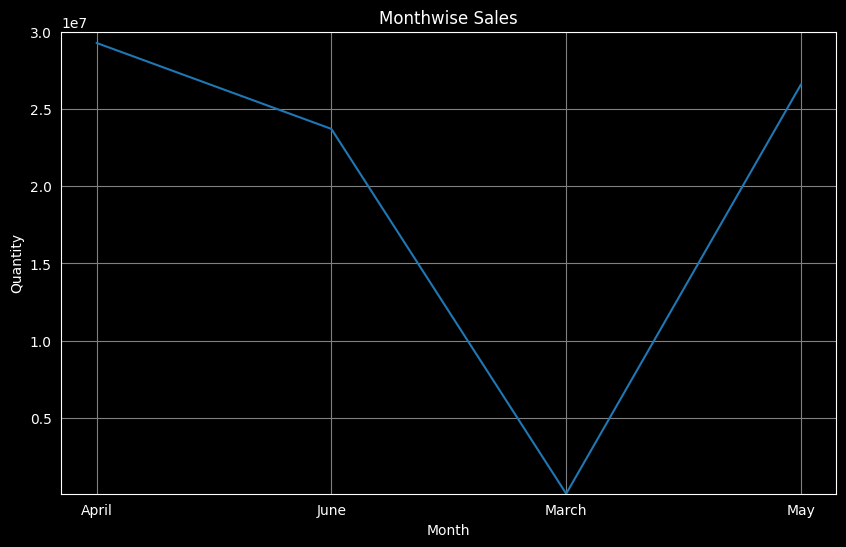

This plot helps to understand the periodic trend in revenue. 


In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Month",y="Amount",data=dataset.groupby('Month')['Amount'].sum().reset_index())
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Monthwise Sales")
plt.ylim(100000,30000000)
plt.show()
print("This plot helps to understand the periodic trend in revenue. ")

**Customer Insights**


In [ ]:
Total_orders = dataset['Order ID'].count()
print(Total_orders)

128949


In [ ]:
Top_Performing_Location=dataset.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)
print(Top_Performing_Location.head(10))


ship-city
BENGALURU    6922304.99
HYDERABAD    5011009.82
MUMBAI       3737062.80
NEW DELHI    3662643.78
CHENNAI      3140005.74
PUNE         2361548.18
KOLKATA      1426321.87
GURUGRAM     1227038.74
THANE        1015698.29
LUCKNOW       951239.34
Name: Amount, dtype: float64


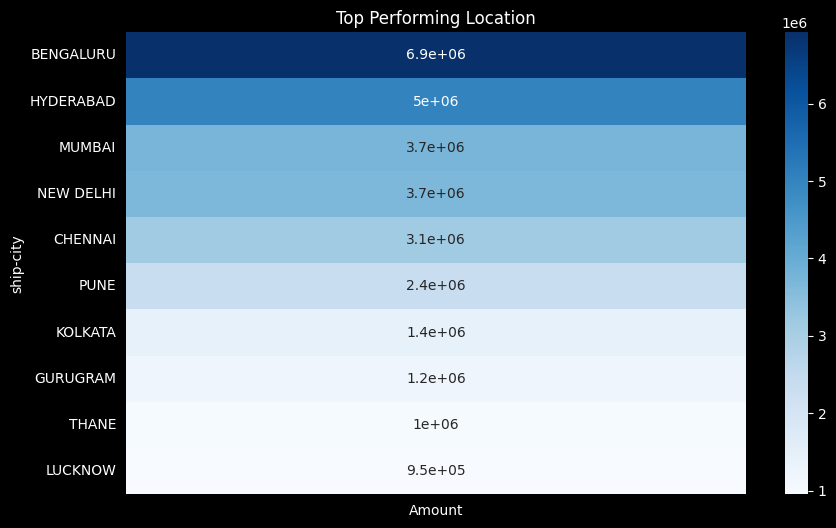

From this analysis we have to understand the need to manage and improve resources in Top_Performing_Location and try to increase the advertisement in less performing area.


In [ ]:
plt.figure(figsize=(10,6))
plt.title("Top Performing Location")
sns.heatmap(data=dataset.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10).to_frame(),annot=True,cmap='Blues')
plt.show()
print(f"From this analysis we have to understand the need to manage and improve resources in Top_Performing_Location and try to increase the advertisement in less performing area.")

In [ ]:
Cancelled_orders_count = dataset[(dataset['Status']=='Cancelled')]['Order ID'].count()
print("Total Cancelled Orders are : " , Cancelled_orders_count)
percentage_of_cancelled_orders = (Cancelled_orders_count/Total_orders)*100
print("Total percentage of Cancelled Orders are : " ,percentage_of_cancelled_orders)

Total Cancelled Orders are :  18341
Total percentage of Cancelled Orders are :  14.223452682843604


In [ ]:
Convert_BtoB = dataset.dtypes
print( Convert_BtoB)

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
promotion-ids                 object
B2B                             bool
fulfilled-by                  object
Unnamed: 22                   object
Month                         object
Day                           object
dtype: object


In [ ]:
dataset['B2B']=dataset['B2B'].astype(str)
print(dataset.dtypes)


Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
promotion-ids                 object
B2B                           object
fulfilled-by                  object
Unnamed: 22                   object
Month                         object
Day                           object
dtype: object


In [ ]:
BtoB_Orders = dataset[(dataset['B2B']=='True')]['B2B'].count()
print("Total B2B Orders are : " , BtoB_Orders)


Total B2B Orders are :  871


In [ ]:
BtoC_Orders = dataset[(dataset['B2B']=='False')]['B2B'].count()
print("Total B2C Orders are : " , BtoC_Orders)

Total B2C Orders are :  128078


In [ ]:
print("B2B has less orders than B2C we have to mould our advertising strategy to increase the sales of B2B and B2C")


B2B has less orders than B2C we have to mould our advertising strategy to increase the sales of B2B and B2C


**Logistics and Fulfillment**


In [ ]:
Fulfillment_Method = dataset[dataset['Fulfilment']=='Amazon']['Fulfilment'].count()
print("Amazon_Method : ",Fulfillment_Method)
Amazon_Efficiency = ((Fulfillment_Method/dataset['Fulfilment'].count())*100)
print("Amazon_Efficiency : ", Amazon_Efficiency)

Amazon_Method :  89679
Amazon_Efficiency :  69.54609962078031


In [ ]:
Fulfillment_Method = dataset[dataset['Fulfilment']=='Merchant']['Fulfilment'].count()
print("Merchant_Method : ",Fulfillment_Method)
Merchant_Efficiency = (Fulfillment_Method/dataset['Fulfilment'].count())*100
print("Merchant_Efficiency : ", Merchant_Efficiency)

Merchant_Method :  39270
Merchant_Efficiency :  30.45390037921969


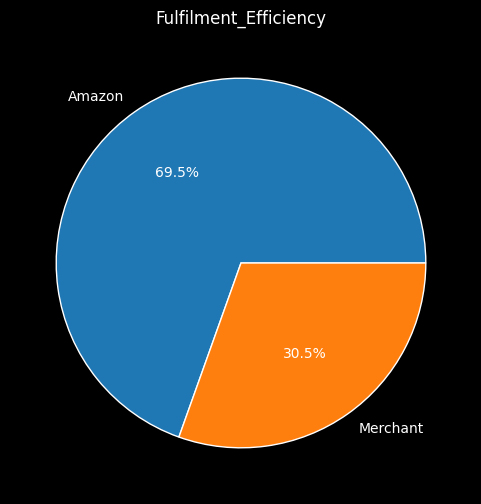

This plot shows the most orders are fulfilled by Amazon means it will be beneficial to collaborate
with other Ecommerce. 


In [ ]:
Fulfilment_data = [Amazon_Efficiency, Merchant_Efficiency]
Label=['Amazon','Merchant']
plt.figure(figsize=(6,6))
plt.title("Fulfilment_Efficiency")
plt.pie(Fulfilment_data,labels=Label, autopct="%1.1f%%")
plt.show()
print("This plot shows the most orders are fulfilled by Amazon means it will be beneficial to collaborate\nwith other Ecommerce. ")

In [ ]:
Shipping_type1 =  dataset[dataset['ship-service-level']=='Expedited']['ship-service-level'].value_counts()
print(Shipping_type1)
Percent_of_Expedited_users = (Shipping_type1.sum()/dataset['ship-service-level'].count())*100
print("Percent_of_Expedited_users : ", Percent_of_Expedited_users)

ship-service-level
Expedited    88596
Name: count, dtype: int64
Percent_of_Expedited_users :  68.7062326966475


In [ ]:
Shipping_type2 =  dataset[dataset['ship-service-level']=='Standard']['ship-service-level'].value_counts()
print(Shipping_type2)
Percent_of_Standard_users = (Shipping_type2.sum()/dataset['ship-service-level'].count())*100
print("Percent_of_Standard_users : ", Percent_of_Standard_users)

ship-service-level
Standard    40353
Name: count, dtype: int64
Percent_of_Standard_users :  31.29376730335249


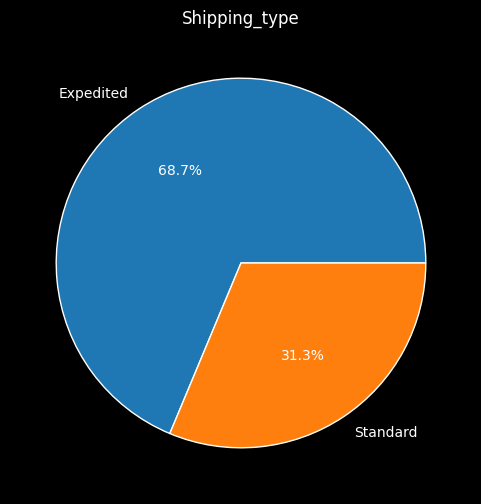

You have more Expideted Customers so you have to improve your delivery service and Customer care
services to enhance your Customers Satisfaction.


In [ ]:
Shipping_type=[Percent_of_Expedited_users,Percent_of_Standard_users]
Label=['Expedited','Standard']
plt.figure(figsize=(6,6))
plt.title("Shipping_type")
plt.pie(Shipping_type,labels=Label, autopct="%1.1f%%")
plt.show()
print("You have more Expideted Customers so you have to improve your delivery service and Customer care\nservices to enhance your Customers Satisfaction.")

In [ ]:
Shipping_fulfilled_by = dataset['fulfilled-by'].value_counts()
print(Shipping_fulfilled_by)

fulfilled-by
Easy Ship    39270
Name: count, dtype: int64


**Product Management**

In [ ]:
Most_ordered_product = dataset.groupby('Category')['Qty'].sum().sort_values(ascending=False)
print(Most_ordered_product)

Category
Set              45288
kurta            45049
Western Dress    13943
Top               9902
Ethnic Dress      1052
Blouse             864
Bottom             398
Saree              152
Dupatta              3
Name: Qty, dtype: int64


In [ ]:
Monthwise_orders = dataset.groupby('Month')['Qty'].sum().sort_values(ascending=False)
print(Monthwise_orders)

Month
April    44210
May      38016
June     34269
March      156
Name: Qty, dtype: int64


In [ ]:
Categorywise_Monthly_sales = dataset.groupby(['Month','Category'])['Qty'].sum()
print(Categorywise_Monthly_sales)


Month  Category     
April  Blouse             401
       Bottom             167
       Ethnic Dress       313
       Saree               68
       Set              18142
       Top               3660
       Western Dress     3780
       kurta            17679
June   Blouse             169
       Bottom             105
       Dupatta              3
       Ethnic Dress       327
       Saree               31
       Set              12672
       Top               2469
       Western Dress     4748
       kurta            13745
March  Blouse               1
       Ethnic Dress         1
       Set                 68
       Top                  9
       Western Dress        6
       kurta               71
May    Blouse             293
       Bottom             126
       Ethnic Dress       411
       Saree               53
       Set              14406
       Top               3764
       Western Dress     5409
       kurta            13554
Name: Qty, dtype: int64


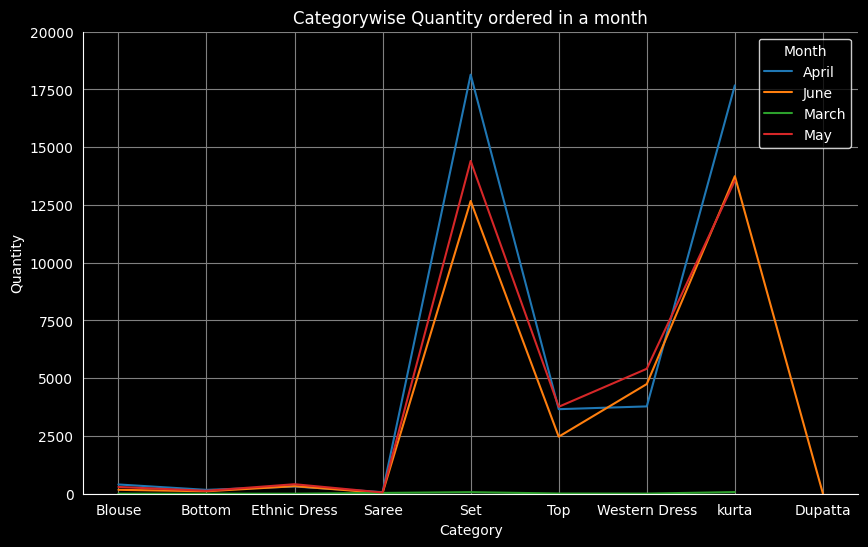

This analysis helps in undestanding Which and How much product is ordered in every month. 


In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Category",y="Qty",hue="Month",data=dataset.groupby(['Month','Category'])['Qty'].sum().reset_index())
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.title("Categorywise Quantity ordered in a month")
plt.ylim(0,20000)
sns.despine()
plt.show()
print(f"This analysis helps in undestanding Which and How much product is ordered in every month. ")

In [ ]:
Top_sold_product = dataset.groupby('Month')['Category'].max()
print(f"Most sold product in every month :\n{Top_sold_product}")

Most sold product in every month :
Month
April    kurta
June     kurta
March    kurta
May      kurta
Name: Category, dtype: object


In [ ]:
Most_ordered_size = dataset['Size'].value_counts()
print(Most_ordered_size)

Size
M       22705
L       22124
XL      20879
XXL     18089
S       17092
3XL     14811
XS      11157
6XL       737
5XL       550
4XL       426
Free      379
Name: count, dtype: int64


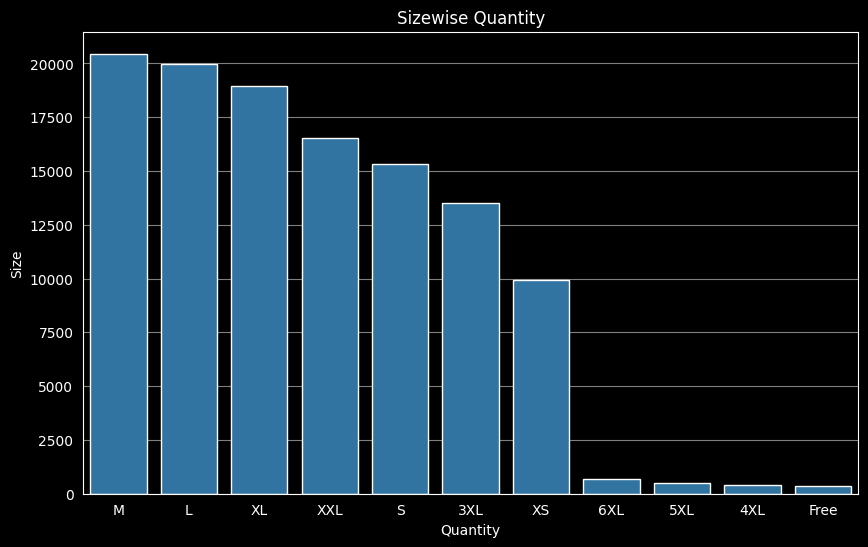

We have to put sufficient stocks of (S,M,L,XL,XXl) size to fulfilment the demand.


In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Size",y="Qty",data=dataset.groupby('Size')['Qty'].sum().sort_values(ascending=False).reset_index())
plt.title("Sizewise Quantity")
plt.xlabel("Quantity")
plt.ylabel("Size")
plt.show()
print("We have to put sufficient stocks of (S,M,L,XL,XXl) size to fulfilment the demand.")

**Customer Satisfaction and Returns**

In [ ]:
Cancelled_orders = dataset[(dataset['Status']=='Cancelled')].groupby('Category')['Qty'].count()
print("Cancelled_orders : ",Cancelled_orders)
print(f"Total Cancelled_orders : {Cancelled_orders.sum()}")


Cancelled_orders :  Category
Blouse            116
Bottom             60
Ethnic Dress      146
Saree              21
Set              7338
Top              1276
Western Dress    2125
kurta            7259
Name: Qty, dtype: int64
Total Cancelled_orders : 18341


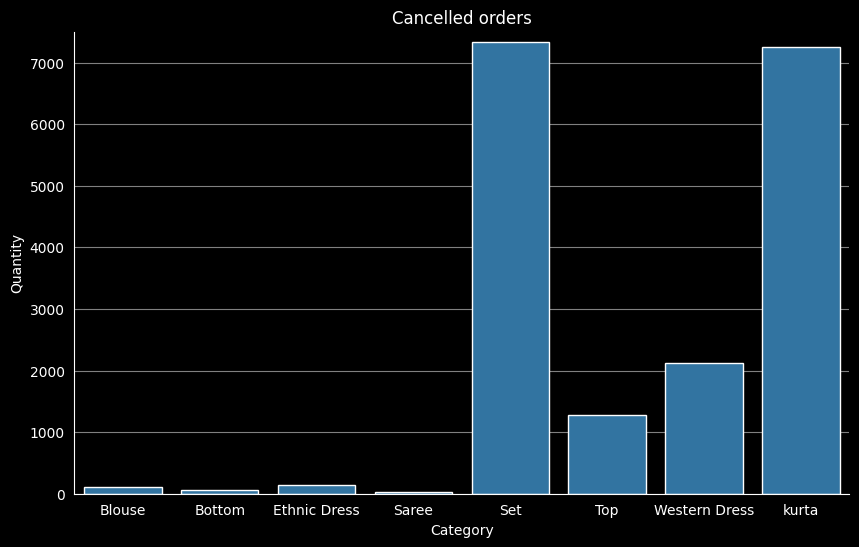

As we see (Set, Kurta and Western dress) are the most cacelled product the reason might be there price
or quality issues so you need to provide good quality at lower price.


In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Category",y="Qty",data= Cancelled_orders.reset_index())
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.title("Cancelled orders")
sns.despine()
plt.ylim(0,7500)
plt.show()
print("As we see (Set, Kurta and Western dress) are the most cacelled product the reason might be there price\nor quality issues so you need to provide good quality at lower price.")

In [ ]:
Sold_Qty = (Category_count-Cancelled_orders)
print(Sold_Qty.sort_values(ascending=False))

Category
Set              37950.0
kurta            37790.0
Western Dress    11818.0
Top               8626.0
Ethnic Dress       906.0
Blouse             748.0
Bottom             338.0
Saree              131.0
Dupatta              NaN
Name: Qty, dtype: float64


In [ ]:
Highest_revenue_product = dataset.groupby('Category')['Amount'].sum()
print(Highest_revenue_product.idxmax(),":",Highest_revenue_product.max())

Set : 39633090.67


In [ ]:
Categorywise_return_orders = dataset[(dataset['Status']=="Shipped - Returned to Seller")|(dataset['Status']=='Shipped - Returning to Seller')|(dataset['Status']=='Shipped - Rejected by Buyer')|(dataset['Courier Status']=='Cancelled')].groupby(['Month','Category'])['Qty'].count()
print(Categorywise_return_orders)


Month  Category     
April  Blouse             19
       Bottom              8
       Ethnic Dress       25
       Saree               2
       Set              1406
       Top               181
       Western Dress     224
       kurta            1293
June   Blouse             11
       Bottom              2
       Ethnic Dress       21
       Saree               4
       Set               876
       Top               109
       Western Dress     265
       kurta             990
March  Set                 8
       kurta               2
May    Blouse             17
       Bottom              7
       Ethnic Dress       22
       Saree               3
       Set              1065
       Top               207
       Western Dress     341
       kurta             935
Name: Qty, dtype: int64


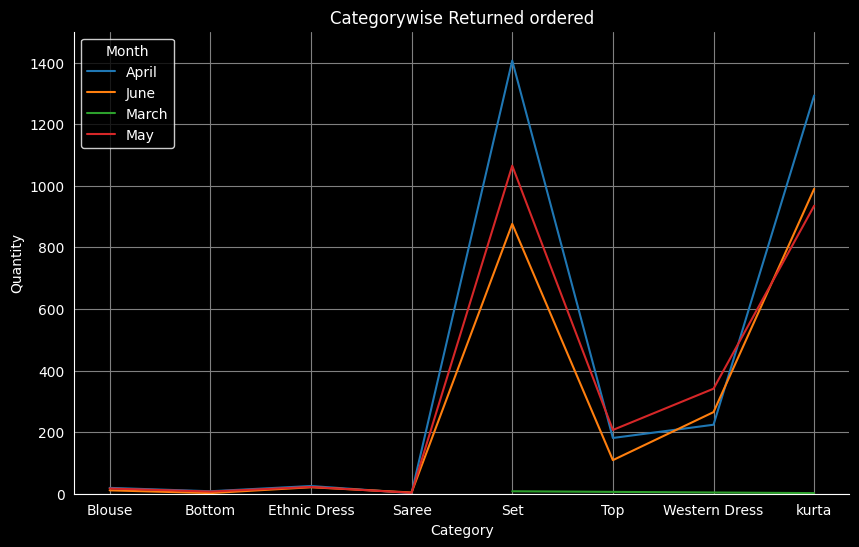

This plot shows the returned product in every month. 


In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Category",y="Qty",hue="Month",data=Categorywise_return_orders.reset_index())
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.title("Categorywise Returned ordered")
plt.ylim(0,1500)
sns.despine()
plt.show()
print("This plot shows the returned product in every month. ")

In [ ]:
Monthwise_return_orders = dataset[(dataset['Status']=="Shipped - Returned to Seller")|(dataset['Status']=='Shipped - Returning to Seller')|(dataset['Status']=='Shipped - Rejected by Buyer')|(dataset['Courier Status']=='Cancelled')].groupby('Month')['Qty'].count()
print(Monthwise_return_orders)

Month
April    3158
June     2278
March      10
May      2597
Name: Qty, dtype: int64


In [ ]:
Return_rate = (Monthwise_return_orders/Monthwise_orders)*100
print(Return_rate)

Month
April    7.143180
June     6.647407
March    6.410256
May      6.831334
Name: Qty, dtype: float64


**Conclusion of this Analysis**


To move towards the sustainable growth, the company needs to follow some points :
1. To increase the revenue:-
*  You need to focus on less performing area and improve your services in top performing locations.
*  Urge a proper advertisement of your company and manage proper resources in those area.
*   Have a proper stock of product and most ordered sizes.
2.  For Customer Satisfaction:-   

*   As we find you have more Expedited shipping type so you need to improve your delivery time and provide better customer support.
3. To cut the Competitive edge in retail landscape:-


*  Provide good Quality product at lower price you may have small margin on a product but it will increase your overall revenue by increasing the number of orders
*   Do dazzling and  proper informative advertisement.

*   Provide offers or sale over a period.







<ipython-input-59-34546fe2fa4e>:2: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dataset['Date'],dataset['Amount'])


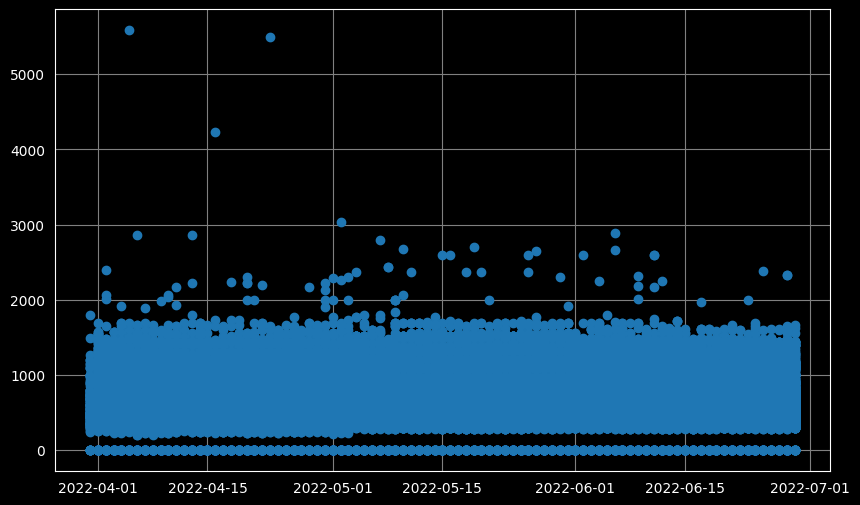

In [ ]:
plt.figure(figsize=(10,6))
plt.plot_date(dataset['Date'],dataset['Amount'])

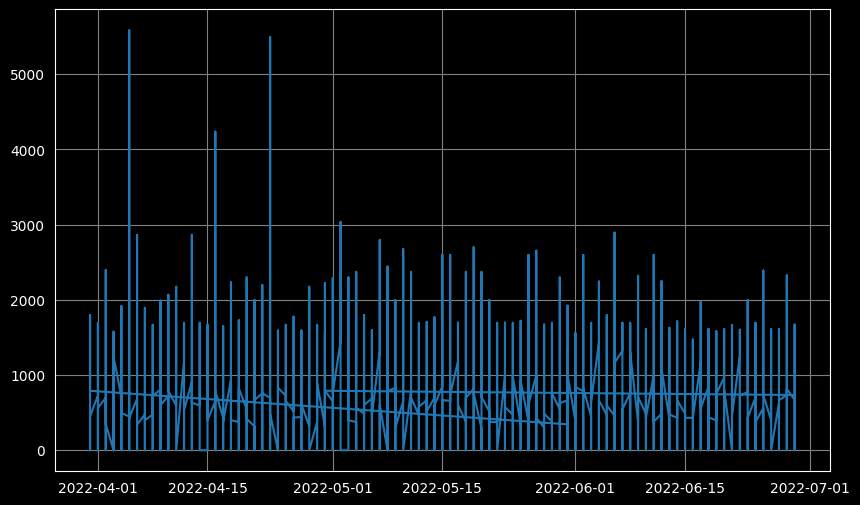

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(dataset['Date'],dataset['Amount'])